In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

In [109]:
dataDirectory = "../Datasets/ESI_Large.csv" #LOAD ESI DATA
rawData = pd.read_csv(dataDirectory, header=0, nrows=None)
rawData

,Month-Year,Unnamed: 1,EU.INDU,EU.SERV,EU.CONS,EU.RETA,EU.BUIL,EU.ESI,EU.EEI,Unnamed: 9,...,Unnamed: 351,Unnamed: 352,Unnamed: 353,Unnamed: 354,Unnamed: 355,Unnamed: 356,Unnamed: 357,Unnamed: 358,Unnamed: 359,Unnamed: 360
0,Jan-05,NaN,-4.4,10.3,-10.0,-8.3,-10.8,100.4,97.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-05,NaN,-4.9,8.1,-9.9,-9.5,-11.0,99.4,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-05,NaN,-6.3,8.5,-10.1,-9.4,-10.5,98.4,97.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-05,NaN,-7.7,9.9,-10.8,-8.2,-8.7,98.1,97.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-05,NaN,-7.8,10.3,-12.1,-9.6,-9.2,97.3,95.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Oct-22,NaN,-1.6,4.1,-28.8,-6.0,0.3,92.8,104.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Nov-22,NaN,-2.1,4.3,-25.1,-5.8,0.1,94.1,106.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Dec-22,NaN,-1.5,6.7,-23.5,-3.6,0.7,95.6,106.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,Jan-23,NaN,-0.1,8.2,-22.1,-1.6,-1.5,97.8,108.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
dataESInoNANs = rawData.dropna(axis=1) #DROP ANY ROWS CONTAINING MISSING VALUES
dataESInoNANs

,Month-Year,EU.INDU,EU.SERV,EU.CONS,EU.RETA,EU.BUIL,EU.ESI,EU.EEI,EA.INDU,EA.SERV,...,FI.BUIL,FI.ESI,FI.EEI,SE.INDU,SE.SERV,SE.CONS,SE.RETA,SE.BUIL,SE.ESI,SE.EEI
0,Jan-05,-4.4,10.3,-10.0,-8.3,-10.8,100.4,97.0,-4.1,9.6,...,-13.3,105.1,99.7,-0.4,31.7,2.0,5.7,6.2,103.6,94.4
1,Feb-05,-4.9,8.1,-9.9,-9.5,-11.0,99.4,96.0,-5.0,6.8,...,-10.7,103.9,105.1,-2.3,29.8,1.5,13.3,-0.9,101.9,92.2
2,Mar-05,-6.3,8.5,-10.1,-9.4,-10.5,98.4,97.3,-6.8,7.2,...,1.3,103.8,100.1,-6.8,30.1,1.9,7.7,-2.9,100.3,95.2
3,Apr-05,-7.7,9.9,-10.8,-8.2,-8.7,98.1,97.2,-8.0,8.7,...,7.2,102.6,104.1,-11.0,32.8,-1.0,4.7,5.7,98.1,94.1
4,May-05,-7.8,10.3,-12.1,-9.6,-9.2,97.3,95.7,-8.7,9.4,...,3.7,102.9,99.5,-8.9,25.8,-0.4,2.4,5.6,97.9,93.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Oct-22,-1.6,4.1,-28.8,-6.0,0.3,92.8,104.7,-0.6,3.3,...,-10.4,85.2,100.6,8.3,7.5,-27.5,-17.7,3.1,83.9,104.9
214,Nov-22,-2.1,4.3,-25.1,-5.8,0.1,94.1,106.1,-1.3,4.0,...,-14.4,83.7,99.9,9.5,4.4,-23.3,-13.9,0.1,86.1,102.8
215,Dec-22,-1.5,6.7,-23.5,-3.6,0.7,95.6,106.1,-0.6,7.5,...,-17.1,82.5,97.4,7.6,4.4,-24.1,-15.7,-3.2,84.0,102.4
216,Jan-23,-0.1,8.2,-22.1,-1.6,-1.5,97.8,108.1,1.2,10.4,...,-24.0,87.2,97.8,4.6,2.5,-23.3,-14.8,-8.8,83.1,100.5


In [111]:
dataESI = dataESInoNANs.copy()
c = 0
for col in dataESInoNANs: #DROP DATA THAT IS NOT THE COUNTRY'S RAW ESI SCORE
    if "EU" not in col and c != 0:
        dataESI.drop(col, axis=1, inplace=True)
    c = 1
dataESI

,Month-Year,EU.INDU,EU.SERV,EU.CONS,EU.RETA,EU.BUIL,EU.ESI,EU.EEI
0,Jan-05,-4.4,10.3,-10.0,-8.3,-10.8,100.4,97.0
1,Feb-05,-4.9,8.1,-9.9,-9.5,-11.0,99.4,96.0
2,Mar-05,-6.3,8.5,-10.1,-9.4,-10.5,98.4,97.3
3,Apr-05,-7.7,9.9,-10.8,-8.2,-8.7,98.1,97.2
4,May-05,-7.8,10.3,-12.1,-9.6,-9.2,97.3,95.7
...,...,...,...,...,...,...,...,...
213,Oct-22,-1.6,4.1,-28.8,-6.0,0.3,92.8,104.7
214,Nov-22,-2.1,4.3,-25.1,-5.8,0.1,94.1,106.1
215,Dec-22,-1.5,6.7,-23.5,-3.6,0.7,95.6,106.1
216,Jan-23,-0.1,8.2,-22.1,-1.6,-1.5,97.8,108.1


In [112]:
dataESI.drop(columns="EU.EEI", axis=1, inplace=True)
dataESI

,Month-Year,EU.INDU,EU.SERV,EU.CONS,EU.RETA,EU.BUIL,EU.ESI
0,Jan-05,-4.4,10.3,-10.0,-8.3,-10.8,100.4
1,Feb-05,-4.9,8.1,-9.9,-9.5,-11.0,99.4
2,Mar-05,-6.3,8.5,-10.1,-9.4,-10.5,98.4
3,Apr-05,-7.7,9.9,-10.8,-8.2,-8.7,98.1
4,May-05,-7.8,10.3,-12.1,-9.6,-9.2,97.3
...,...,...,...,...,...,...,...
213,Oct-22,-1.6,4.1,-28.8,-6.0,0.3,92.8
214,Nov-22,-2.1,4.3,-25.1,-5.8,0.1,94.1
215,Dec-22,-1.5,6.7,-23.5,-3.6,0.7,95.6
216,Jan-23,-0.1,8.2,-22.1,-1.6,-1.5,97.8


In [113]:
formattedDates = dataESI["Month-Year"].apply(lambda x: x[0:4]+"20"+x[4:])
formattedDates

0      Jan-2005
1      Feb-2005
2      Mar-2005
3      Apr-2005
4      May-2005
         ...   
213    Oct-2022
214    Nov-2022
215    Dec-2022
216    Jan-2023
217    Feb-2023
Name: Month-Year, Length: 218, dtype: object

In [114]:
dataESI["Month-Year"] = pd.to_datetime(formattedDates)
dataESI

,Month-Year,EU.INDU,EU.SERV,EU.CONS,EU.RETA,EU.BUIL,EU.ESI
0,2005-01-01,-4.4,10.3,-10.0,-8.3,-10.8,100.4
1,2005-02-01,-4.9,8.1,-9.9,-9.5,-11.0,99.4
2,2005-03-01,-6.3,8.5,-10.1,-9.4,-10.5,98.4
3,2005-04-01,-7.7,9.9,-10.8,-8.2,-8.7,98.1
4,2005-05-01,-7.8,10.3,-12.1,-9.6,-9.2,97.3
...,...,...,...,...,...,...,...
213,2022-10-01,-1.6,4.1,-28.8,-6.0,0.3,92.8
214,2022-11-01,-2.1,4.3,-25.1,-5.8,0.1,94.1
215,2022-12-01,-1.5,6.7,-23.5,-3.6,0.7,95.6
216,2023-01-01,-0.1,8.2,-22.1,-1.6,-1.5,97.8


In [115]:
dataESI.set_index("Month-Year", inplace=True)
dataESI

,EU.INDU,EU.SERV,EU.CONS,EU.RETA,EU.BUIL,EU.ESI
Month-Year,,,,,,
2005-01-01,-4.4,10.3,-10.0,-8.3,-10.8,100.4
2005-02-01,-4.9,8.1,-9.9,-9.5,-11.0,99.4
2005-03-01,-6.3,8.5,-10.1,-9.4,-10.5,98.4
2005-04-01,-7.7,9.9,-10.8,-8.2,-8.7,98.1
2005-05-01,-7.8,10.3,-12.1,-9.6,-9.2,97.3
...,...,...,...,...,...,...
2022-10-01,-1.6,4.1,-28.8,-6.0,0.3,92.8
2022-11-01,-2.1,4.3,-25.1,-5.8,0.1,94.1
2022-12-01,-1.5,6.7,-23.5,-3.6,0.7,95.6


In [116]:
for col in dataESI:
    print(col)

EU.INDU
EU.SERV
EU.CONS
EU.RETA
EU.BUIL
EU.ESI


In [117]:
model = VAR(dataESI)
model

c:\Users\jackm\.conda\envs\main\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [118]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Mar, 2023
Time:                     12:10:06
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    2.58695
Nobs:                     216.000    HQIC:                   1.86052
Log likelihood:          -1908.70    FPE:                    3.93130
AIC:                      1.36810    Det(Omega_mle):         2.76851
--------------------------------------------------------------------
Results for equation EU.INDU
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const            -15.389372        29.221739           -0.527           0.598
L1.EU.INDU         1.471793         0.441931            3.330           0.001
L1.EU.SERV         0.102938         0.239051            0.431         

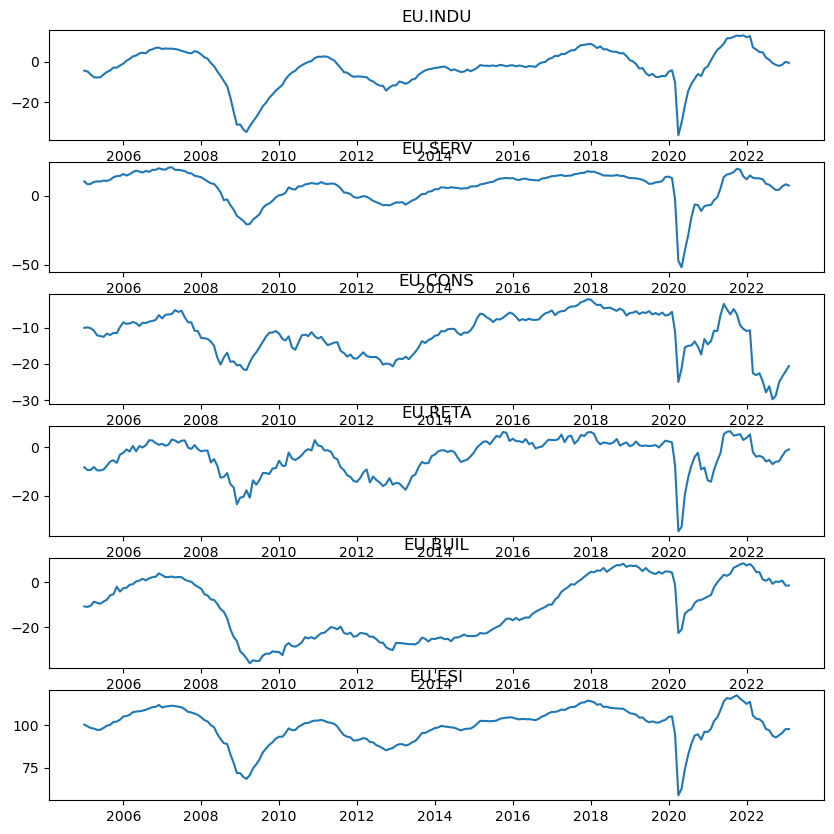

In [119]:
fig = results.plot()

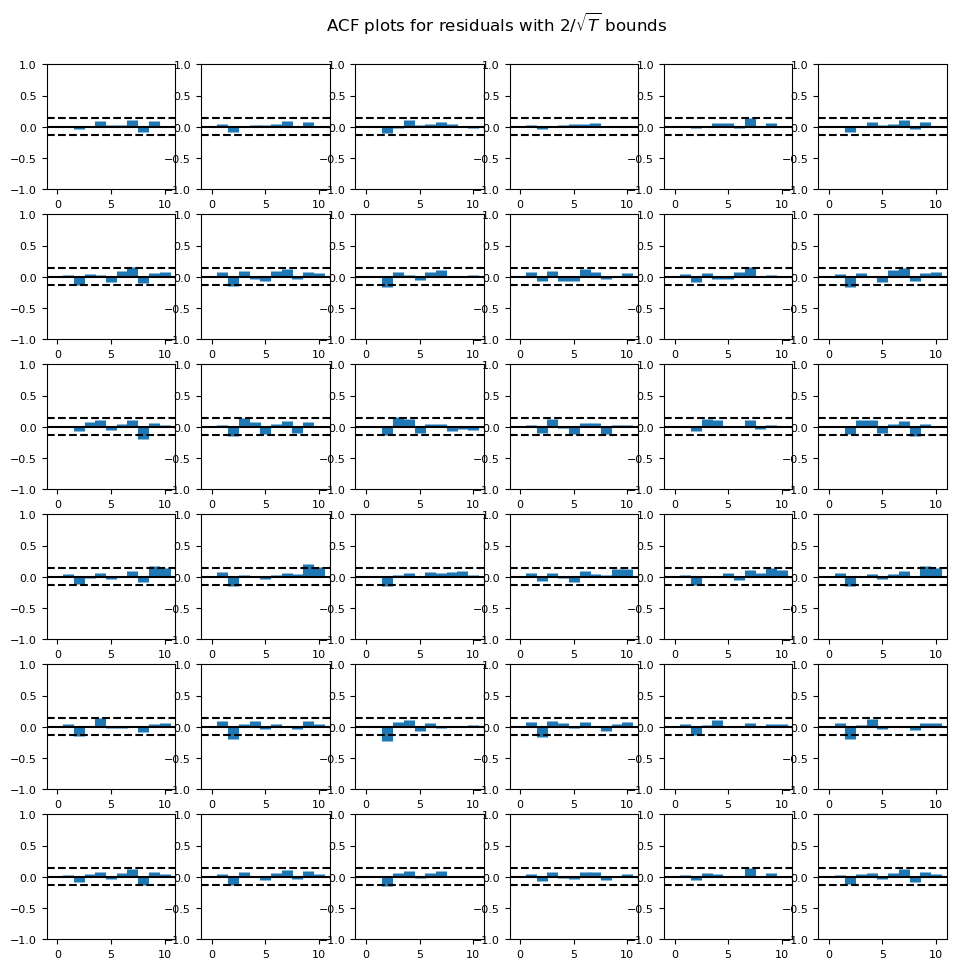

In [120]:
fig = results.plot_acorr()

In [121]:
model.select_order(15)

In [122]:
results = model.fit(maxlags=15, ic='aic')

In [125]:
lag_order = results.k_ar
results.forecast(dataESI.values[-lag_order:], 10)

array([[ -1.70558805,   5.95498623, -18.66971459,  -1.28572987,
         -3.32727769,  97.55462451],
       [ -5.324537  ,   1.49774384, -19.325043  ,  -3.93447907,
         -5.8204644 ,  93.66032349],
       [ -8.13837131,  -1.62010579, -19.18621151,  -6.32136472,
         -8.36016941,  91.03361654],
       [-10.89960323,  -4.4837862 , -19.20391758,  -8.84129256,
        -10.03150632,  88.45812354],
       [-12.52984155,  -6.38231589, -18.60848346,  -8.99205456,
        -11.96429212,  87.24731736],
       [-14.72930092,  -8.06247379, -18.60850385,  -9.9999195 ,
        -13.8687299 ,  85.52264814],
       [-16.61812617,  -9.43332943, -18.33615141, -10.70755793,
        -15.88042654,  84.18574156],
       [-18.30884736, -10.44307196, -17.97699214, -11.37935958,
        -17.52225078,  83.09210474],
       [-19.55455913, -11.14324831, -17.61616711, -11.46890524,
        -18.97228376,  82.39790428],
       [-20.77199184, -12.21734114, -17.49694531, -12.44781705,
        -20.52859327,  81.4

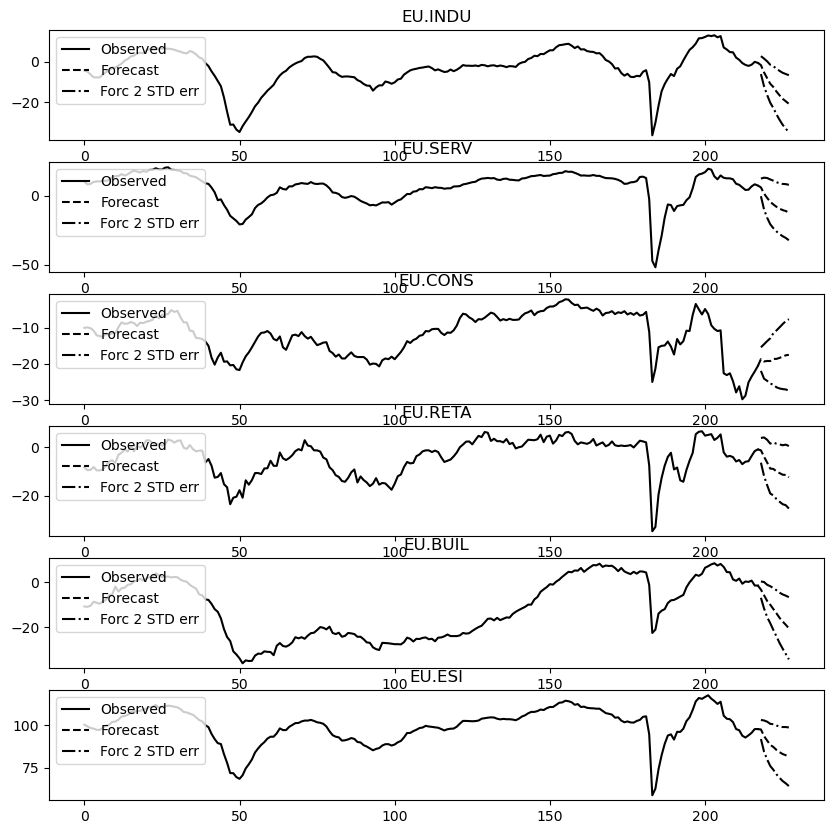

In [124]:
fig = results.plot_forecast(10)
for i in range(0,6):
    fig.get_axes()[i].legend(loc="upper left")